In [1]:
# ËØªÂèñ‰∏Ä‰∏™‰∫∫ÁöÑÊï∞ÊçÆ
# Ê†áËÆ∞ÂØπÂ∫îÁöÑÊ≠•ÊÄÅÁâπÂæÅÊó∂Âàª
# ‰ΩøÁî®Â∞èÊ≥¢ÂàÜÊûêËÆ°ÁÆóÂØπÂ∫îÁöÑÁâπÂæÅÊó∂Âàª

## ÂØºÂÖ•ÂåÖ

In [61]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [62]:
%matplotlib widget

## ËØªÂèñÊï∞ÊçÆ

In [63]:
# Ë∑ØÂæÑ
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/Â∑•‰ΩúÊñáÊ°£/Âåó‰∫¨ÊÇ¶Âä®/ËÑëÂçí‰∏≠È°πÁõÆ/ÈòøÂ∏ÖÁ¨îËÆ∞/HarbinStroke/Xsens/Process_Data/Excel/20230706_ÂáåËã•È£û_Xsens_Êó†Áü´ÂΩ¢Âô®-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [64]:
# Ë∑ØÂæÑ
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/Â∑•‰ΩúÊñáÊ°£/Âåó‰∫¨ÊÇ¶Âä®/ËÑëÂçí‰∏≠È°πÁõÆ/ÈòøÂ∏ÖÁ¨îËÆ∞/HarbinStroke/Xsens/Process_Data/Excel/20230706_ÂáåËã•È£û_Xsens_Êó†Áü´ÂΩ¢Âô®-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [65]:
# Ë∑ØÂæÑ
xsens_excel_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/Â∑•‰ΩúÊñáÊ°£/Âåó‰∫¨ÊÇ¶Âä®/ËÑëÂçí‰∏≠È°πÁõÆ/ÈòøÂ∏ÖÁ¨îËÆ∞/HarbinStroke/Xsens/Process_Data/Excel/20230706_ÂáåËã•È£û_Xsens_Êó†Áü´ÂΩ¢Âô®-1.xlsx"
excelfile = pd.ExcelFile(xsens_excel_path, engine='openpyxl')
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

## ÂáåËã•È£ûÊ≠•Ë°åÁâπÂæÅÊó∂Âàª
ÊúâÁü´ÂΩ¢Âô®Á¨¨‰∏ÄÊ¨°ÊµãËØï
- Â∑¶ËÑöÁ¨¨‰∏ÄÊ¨°ÁùÄÂú∞	Â∑¶ËÑöÁ¨¨‰∫åÊ¨°ÁùÄÂú∞	Â∑¶ËÑöÁ¨¨‰∏âÊ¨°ÁùÄÂú∞	
- 1890	2003	2119	
- Âè≥ËÑöÁ¨¨‰∏ÄÊ¨°ÁùÄÂú∞	Âè≥ËÑöÁ¨¨‰∫åÊ¨°ÁùÄÂú∞	Âè≥ËÑöÁ¨¨‰∏âÊ¨°ÁùÄÂú∞
- 1944	2057	2168

In [66]:
events = [1890, 2003, 2119]

## ÂÖ≥ËäÇ‰ΩçÁΩÆÁªòÂà∂Â≥∞ÂÄº

In [67]:
plt.close()

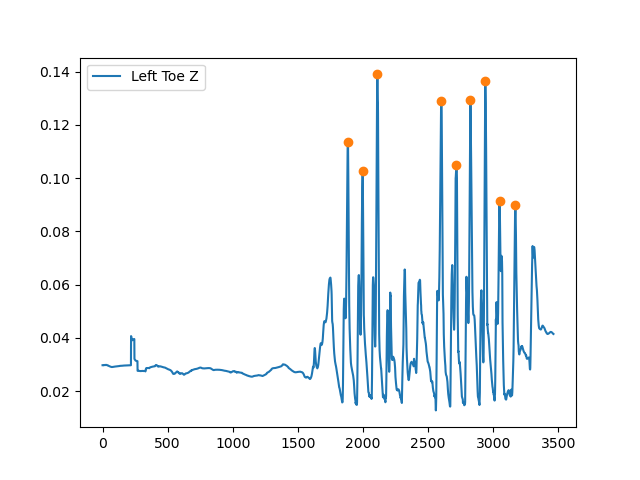

In [68]:
seg_pos = pd.read_excel(xsens_excel_path,sheet_name='Segment Position')
L_Toe_z = seg_pos['Left Toe z']
seg_pos_peaks, _ = find_peaks(L_Toe_z, height=0.08)
plt.plot(L_Toe_z, label="Left Toe Z")
plt.plot(seg_pos_peaks, L_Toe_z[seg_pos_peaks],"o")
plt.legend()

## ËÑöË∏ùËßíÂ∫¶ÁªòÂà∂Â≥∞ÂÄº
Âú® GaitPy ‰∏≠ util.py ‰∏≠Âè™Ë∞ÉÁî®‰∫Ü Prominence ÂèÇÊï∞
```python
def _detect_peaks(y, prominence):
    from scipy.signal import find_peaks
    peaks, properties = find_peaks(y, prominence=prominence)

    return peaks
```
Âú® gait.py ‰∏≠ÔºåÊúâ prominence ÁöÑÂèñÂÄº

`ic_prom=5, fc_prom=10`

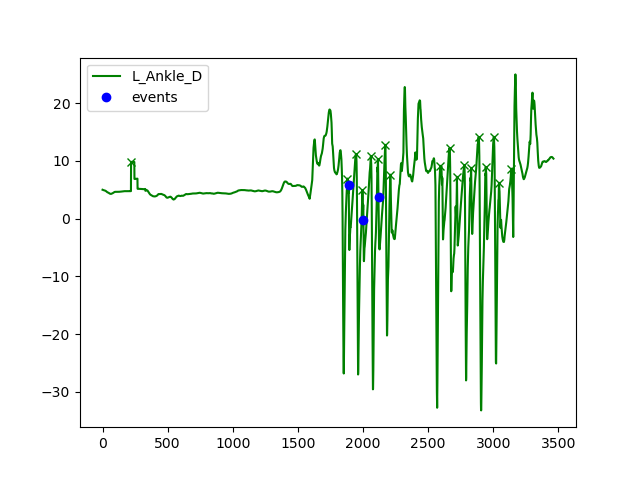

In [71]:
# ÊèêÂèñÊï∞ÊçÆ
joint_angels = pd.read_excel(xsens_excel_path,sheet_name="Joint Angles ZXY")
joint_angels.columns
L_Ankle_D = joint_angels['Left Ankle Dorsiflexion/Plantarflexion']

# ÈÄâÂèñÁâπÂÆöÂå∫Âüü
Sel_L_Ankle_D = joint_angels.loc[events[0]-200:events[1]+200,'Left Ankle Dorsiflexion/Plantarflexion']

# Ëé∑ÂèñÂ≥∞ÂÄº
angle_peaks, _ = find_peaks(L_Ankle_D,height=[2,15], prominence=5)

plt.close()
# Ê†πÊçÆËÑöË∏ùËßíÂ∫¶Êü•ÊâæÁâπÂæÅÊó∂Âàª
plt.plot(L_Ankle_D,label="L_Ankle_D",color="green")
plt.plot(angle_peaks, L_Ankle_D[angle_peaks],"x", color="green") 

# Ê†πÊçÆËÇâÁúºÂà§Êñ≠ÁâπÂæÅÊó∂Âàª
plt.plot(events,L_Ankle_D[events],"o",label="events",color="blue")
plt.legend()

## ‰∏éÁâπÂæÅÊó∂ÂàªÊúÄÊé•ËøëÁöÑ 3 ‰∏™Êó∂Âàª

In [19]:
# ÈÄâÂèñÂíåÁõÆÊ†áÊï∞ÂÄºÊúÄ‰∏∫Êé•ËøëÁöÑ 3 ‰∏™ÂÄº
nearest_values = []
for event in events:
    nearest_index = np.argmin(np.abs(angle_peaks - event))
    nearest_value = angle_peaks[nearest_index]
    nearest_values.append(nearest_value)

print(nearest_values)
"""
‰∏äËø∞ÊòØÁÆÄÂçïÁöÑÁÆóÊ≥ï
- Êó∂Èó¥Â§çÊùÇÂ∫¶‰∏∫ O(m*n): nÊòØevents ÂàóË°®ÁöÑÈïøÂ∫¶Ôºåm ÊòØangle_peaks Êï∞ÁªÑÁöÑÈïøÂ∫¶
- Á©∫Èó¥Â§çÊùÇÂ∫¶‰∏∫ O(n):n ÊòØevents ÂàóË°®ÁöÑÈïøÂ∫¶ÔºåËÄÉËôëÂéüÂßãËæìÂÖ•Êï∞ÊçÆÁöÑÁ©∫Èó¥Â§çÊùÇÂ∫¶Ôºå
    ‰æãÂ¶Çangle_peaksÊï∞ÁªÑÁöÑÂ≠òÂÇ®Á©∫Èó¥ÔºåÂàô‰ºöÈ¢ùÂ§ñÂ¢ûÂä†O(m)ÔºåÂÖ∂‰∏≠mÊòØangle_peaksÊï∞ÁªÑÁöÑÈïøÂ∫¶„ÄÇ
"""

[1880, 1995, 2114]


'\n‰∏äËø∞ÊòØÁÆÄÂçïÁöÑÁÆóÊ≥ï\n- Êó∂Èó¥Â§çÊùÇÂ∫¶‰∏∫ O(m*n): nÊòØevents ÂàóË°®ÁöÑÈïøÂ∫¶Ôºåm ÊòØangle_peaks Êï∞ÁªÑÁöÑÈïøÂ∫¶\n- Á©∫Èó¥Â§çÊùÇÂ∫¶‰∏∫ O(n):n ÊòØevents ÂàóË°®ÁöÑÈïøÂ∫¶ÔºåËÄÉËôëÂéüÂßãËæìÂÖ•Êï∞ÊçÆÁöÑÁ©∫Èó¥Â§çÊùÇÂ∫¶Ôºå\n    ‰æãÂ¶Çangle_peaksÊï∞ÁªÑÁöÑÂ≠òÂÇ®Á©∫Èó¥ÔºåÂàô‰ºöÈ¢ùÂ§ñÂ¢ûÂä†O(m)ÔºåÂÖ∂‰∏≠mÊòØangle_peaksÊï∞ÁªÑÁöÑÈïøÂ∫¶„ÄÇ\n'

In [20]:
events

[1890, 2003, 2119]

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
MAE = mean_absolute_error(events, nearest_values)
MAPE = mean_absolute_percentage_error(events, nearest_values)
MSE = mean_squared_error(events,nearest_values)
RMSE = np.sqrt(MSE)
ICC,p_value = pearsonr(events, nearest_values)

print(f"MAE  is {MAE:.1f}")
print(f"MAPE is {MAPE:.4f}")
print(f"RMSE is {RMSE:.2f}")
print(f"ICC  is {ICC:.2f}")

MAE  is 7.7
MAPE is 0.0039
RMSE is 7.94
ICC  is 1.00


In [38]:
## Â¢ûÂä†‰∫∫+Ê¨°Êï∞+ÁùÄÂú∞+Â∑¶Âè≥+peak_height+peak_prominent„Äêto do„Äë
name = "ÂáåËã•È£û"
footwear_condition = "Êó†Áü´ÂΩ¢Âô®"
test_number = "1"
eventtype = "ÁùÄÂú∞Êó∂Âàª"
segment_type = "Left"
analysis_signal = "Ë∏ùÂÖ≥ËäÇÂ±à‰º∏"
peak_type = "Áõ¥Êé•Ê≥¢Â≥∞Ê≥ï"
IC_peak_height = 5
# peak_prominet = ÈªòËÆ§ÂÄºÊòØ 0 ÂêóÔºü
title = f"{name}_{footwear_condition}_{eventtype}_{IC_peak_height}"
title 


'ÂáåËã•È£û_Êó†Áü´ÂΩ¢Âô®_ÁùÄÂú∞Êó∂Âàª_5'

## Â∞èÊ≥¢ÂàÜÊûê
Êõ¥Â§öÁ¨îËÆ∞‰∏éÂèÇËÄÉËµÑÊñôËßÅÔºö
1. Â∞èÊ≥¢ÂàÜÊûê‚ÄîWolfram ËØ≠Ë®ÄÂèÇËÄÉËµÑÊñô. https://reference.wolfram.com/language/guide/Wavelets.html. ËßÅ‰∫é 2023Âπ¥9Êúà15Êó•.
2. https://ww2.mathworks.cn/help/deeplearning/ug/classify-time-series-using-wavelet-analysis-and-deep-learning_zh_CN.html Matlab ÂÖ≥‰∫éÂ∞èÊ≥¢ÂàÜÊûêÁöÑ‰ªãÁªç

In [46]:
sample_rate = 100
y = L_Ankle_D
from scipy import signal, integrate
import pywt
# ËøûÁª≠Â∞èÊ≥¢ÂèòÂåñÂ∞∫Â∫¶Âõ†Â≠êÔºàscale parametersÔºâ
scale_cwt = float(sample_rate) / 5

# ËøûÁª≠Ê¢ØÂΩ¢ÁßØÂàÜÔºàcumulative trapezoidal integrationÔºâ
# Âéü‰ª£Á†Å‰∏∫-ÂÄºÁöÑÁßØÂàÜ
# integrated_data = integrate.cumtrapz(-filtered_data)
integrated_data = integrate.cumtrapz(y) 

# È´òÊñØËøûÁª≠Â∞èÊ≥¢ÂèòÂåñ
cwt, freqs = pywt.cwt(integrated_data, scale_cwt, "gaus1")
differentiated_data = cwt[0]

Text(0.5, 1.0, '20230907_Â∞èÊ≥¢ÂèòÂåñÁªìÊûú')

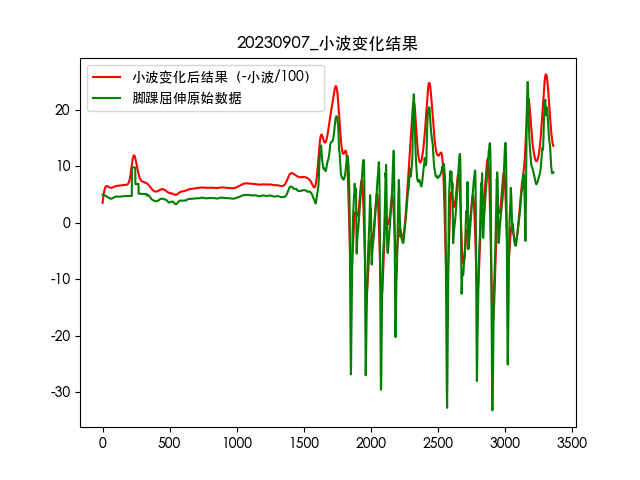

In [47]:
plt.close()
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(-cwt[0][0:-100]/100,"r",label="Â∞èÊ≥¢ÂèòÂåñÂêéÁªìÊûúÔºà-Â∞èÊ≥¢/100Ôºâ")
plt.plot(y[0:-100],"g",label="ËÑöË∏ùÂ±à‰º∏ÂéüÂßãÊï∞ÊçÆ")
plt.legend()
plt.title("20230907_Â∞èÊ≥¢ÂèòÂåñÁªìÊûú")

In [36]:
plt.close()

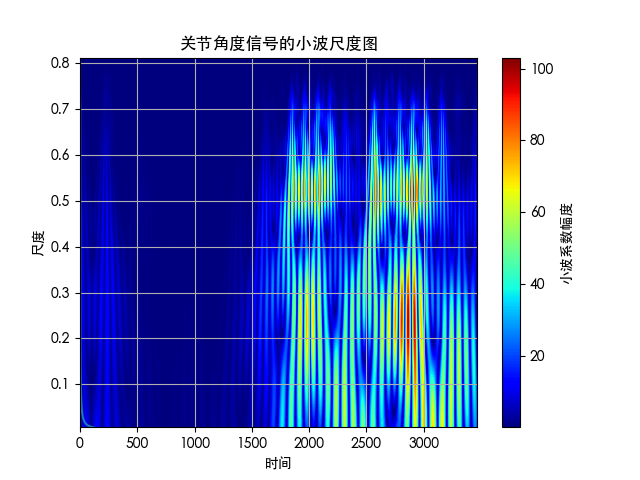

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# ÂáÜÂ§áÂÖ≥ËäÇËßíÂ∫¶‰ø°Âè∑Êï∞ÊçÆ


# ÈÄâÊã©Â∞èÊ≥¢ÂáΩÊï∞ÂíåÂ∞∫Â∫¶ËåÉÂõ¥
wavelet_name = 'morl'  # ‰ΩøÁî®MorletÂ∞èÊ≥¢ÂáΩÊï∞
scales = np.arange(1, 128)  # Â∞∫Â∫¶ËåÉÂõ¥

# ËøõË°åËøûÁª≠Â∞èÊ≥¢ÂèòÊç¢
coef, freqs = pywt.cwt(L_Ankle_D, scales, wavelet_name, sampling_period=1)

# ÁªòÂà∂Â∞∫Â∫¶Âõæ
plt.imshow(np.abs(coef), extent=[0, len(L_Ankle_D), freqs[-1], freqs[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Â∞èÊ≥¢Á≥ªÊï∞ÂπÖÂ∫¶')
plt.xlabel('Êó∂Èó¥')
plt.ylabel('Â∞∫Â∫¶')
plt.title('ÂÖ≥ËäÇËßíÂ∫¶‰ø°Âè∑ÁöÑÂ∞èÊ≥¢Â∞∫Â∫¶Âõæ')
plt.show()

## ÂÜôÂæ™ÁéØ

### ËÆ°ÁÆóÁâπÂæÅÂÄº

In [45]:
# ËÆ°ÁÆóÁâπÂæÅÂÄº
def CalEvents(data, events, peak_height, peak_prominence):
    """
    ËÆ°ÁÆóÁªôÂÆöÊï∞ÊçÆ‰∏≠‰∏éÁªôÂÆö‰∫ã‰ª∂ÊúÄÊé•ËøëÁöÑÂ≥∞ÂÄº„ÄÇ

    ÂèÇÊï∞Ôºö
    - dataÔºö‰∏ÄÁª¥Êï∞ÁªÑÔºå‰ª£Ë°®ËæìÂÖ•Êï∞ÊçÆ„ÄÇ
    - eventsÔºö‰∏ÄÁª¥Êï∞ÁªÑÔºå‰ª£Ë°®‰∫ã‰ª∂ÂàóË°®„ÄÇ
    - peak_heightÔºöÊ†áÈáèÊàñ‰∏ÄÁª¥Êï∞ÁªÑÔºåÂ≥∞ÂÄºÁöÑÈ´òÂ∫¶ÈòàÂÄº„ÄÇ
    - peak_prominenceÔºöÊ†áÈáèÊàñ‰∏ÄÁª¥Êï∞ÁªÑÔºåÂ≥∞ÂÄºÁöÑÁ™ÅÂá∫Â∫¶ÈòàÂÄº„ÄÇ

    ËøîÂõûÂÄºÔºö
    ‰∏éÊØè‰∏™‰∫ã‰ª∂ÊúÄÊé•ËøëÁöÑÂ≥∞ÂÄºÂàóË°®„ÄÇ

    Á§∫‰æãÔºö
    data = [0, 1, 2, 1, 0, 1, 2, 1, 0]
    events = [1, 2, 3]
    peak_height = 0.5
    peak_prominence = 0.5
    result = CalEvents(data, events, peak_height, peak_prominence)
    # ËøîÂõû [1, 2, 1]

    """
    from scipy.signal import find_peaks
    import numpy as np
    peaks, _ = find_peaks(data, height=peak_height, prominence=peak_prominence)

    # Êü•ÊâæÂíåevent ÊúÄÊé•ËøëÁöÑÂÄº
    nearest_values = []
    for event in events:
        nearest_index  = np.argmin(np.abs(peaks-event))
        nearest_value = peaks[nearest_index]
        nearest_values.append(nearest_value)
    
    cal_events = nearest_values
    return cal_events

### ÁªòÂà∂ÁâπÂæÅÂÄº

In [111]:
# ÊèêÂèñÊï∞ÊçÆ,ÁªòÂà∂ÂõæÁâá
import os
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
def PlotEvents(data,events,cal_events,select_column,plot_title,plot_dir):

    """
    ÂäüËÉΩÔºöÁªòÂà∂ÁâπÂæÅÊó∂ÂàªÂõæÁâá
    data: series, ÈÄâÂèñÁöÑ‰ø°Âè∑Êõ≤Á∫ø
    events: ÂàóË°®Ôºå‰∫∫Â∑•Ëé∑ÂèñÂæóÂà∞ÁöÑÁâπÂæÅÊó∂ÂàªÁöÑÈáëÊ†áÂáÜ
    cal_events: ËÆ°ÁÆóÂæóÂà∞ÁöÑÁâπÂæÅÊó∂Âàª
    plot_title: ÁªòÂà∂ÂõæÁâáÁöÑÊ†áÈ¢ò
    plot_path: ÂõæÁâáÂÇ®Â≠òÁöÑË∑ØÂæÑ
    """

    # ÁªòÂà∂ËÆ°ÁÆóÂæóÂà∞ÁöÑÁâπÂæÅÊó∂Âàª
    plt.plot(data, label=select_column,color="green")
    plt.plot(cal_events, data[cal_events],"x", color="green")

    # ÁªòÂà∂‰∫∫Â∑•Ëé∑ÂèñÁöÑÁâπÂæÅÊó∂Âàª
    plt.plot(events, data[events],"o", label="events", color="blue")
    plt.legend()

    # ÁªòÂà∂Ê†áÈ¢òÂπ∂ÊòæÁ§∫ÂõæÂÉè
    plt.title(plot_title)
    #plt.show()

    # ‰øùÂ≠òÂõæÁâá
    plot_path = os.path.join(plot_dir, plot_title)
    plt.savefig(plot_path)
    plt.close()

### ËØÑ‰ª∑ÁÆóÊ≥ïÁ≤æÂ∫¶

In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np
def EvaluateAccuracy(events, cal_events):
    """
    ËÆ°ÁÆó‰∫ã‰ª∂ÂíåËÆ°ÁÆó‰∫ã‰ª∂‰πãÈó¥ÁöÑÂáÜÁ°ÆÊÄßÊåáÊ†á„ÄÇ

    ÂèÇÊï∞Ôºö
    - eventsÔºö‰∏ÄÁª¥Êï∞ÁªÑÔºå‰∫ã‰ª∂ÂàóË°®„ÄÇ
    - cal_eventsÔºö‰∏ÄÁª¥Êï∞ÁªÑÔºåËÆ°ÁÆóÂæóÂà∞ÁöÑ‰∫ã‰ª∂ÂàóË°®„ÄÇ

    ËøîÂõûÂÄºÔºö
    MAEÔºöÂπ≥ÂùáÁªùÂØπËØØÂ∑ÆÔºàMean Absolute ErrorÔºâ„ÄÇ
    MAPEÔºöÂπ≥ÂùáÁªùÂØπÁôæÂàÜÊØîËØØÂ∑ÆÔºàMean Absolute Percentage ErrorÔºâ„ÄÇ
    RMSEÔºöÂùáÊñπÊ†πËØØÂ∑ÆÔºàRoot Mean Squared ErrorÔºâ„ÄÇ
    ICCÔºöÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàPearson correlation coefficientÔºâ„ÄÇ
    p_valueÔºöICCÁöÑÂÅáËÆæÊ£ÄÈ™åpÂÄº„ÄÇ

    """

    MAE = mean_absolute_error(events, cal_events)
    MAPE = mean_absolute_percentage_error(events, cal_events)
    MSE = mean_squared_error(events, cal_events)
    RMSE = np.sqrt(MSE)
    ICC, p_value = pearsonr(events, cal_events)

    return round(MAE,2), round(MAPE,2), round(RMSE,2), round(ICC,2), round(p_value,3)

### ‰∏ªÂáΩÊï∞

In [ ]:
# Ë∞ÉÁî®ÂåÖ
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 
from collections import defaultdict

# ÂÆö‰πâÂèòÈáè
sheet_name = "Joint Angles ZXY"
segment_type = "Â∑¶ËÑö"
select_column = 'Left Ankle Dorsiflexion/Plantarflexion'
events_cols = [f"{segment_type}Á¨¨‰∏ÄÊ¨°ÁùÄÂú∞",f"{segment_type}Á¨¨‰∫åÊ¨°ÁùÄÂú∞",f"{segment_type}Á¨¨‰∏âÊ¨°ÁùÄÂú∞"]

# ÂÆö‰πâÁÆóÊ≥ïÂèòÈáè
peak_prominence = 5
peak_height = [2,15]

# Ë∑ØÂæÑ
root_dir_path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/Â∑•‰ΩúÊñáÊ°£/Âåó‰∫¨ÊÇ¶Âä®/ËÑëÂçí‰∏≠È°πÁõÆ/ÈòøÂ∏ÖÁ¨îËÆ∞/HarbinStroke"
xsens_excel_folder_path = "./Xsens/Process_Data/Excel"
plot_dir = "./Xsens/Event/Plot"
result_excel_dir = "./Xsens/Event"
events_path = "./ÊñáÊ°£/20230919_ÈôàÊÄùÂΩ§_strokeÁâπÂæÅÊó∂Âàª_Âà†Èô§Êó†ÊïàÊï∞ÊçÆ.xlsx"

# ÂàáÊç¢Ë∑ØÂæÑ
os.chdir(root_dir_path)
# ËØªÂèñÁâπÂæÅÊó∂ÂàªÊï∞ÊçÆ
events_df = pd.read_excel(events_path)

# ÊûÑÂª∫ÈªòËÆ§ËØçÂÖ∏
results = defaultdict(list)

# Âæ™ÁéØËØªÂèñÊâÄÊúâÁâπÂæÅÊó∂Âàª
for index, row in events_df.iterrows():  
    events = row[events_cols]
    name = row["ÂèóËØïËÄÖÂßìÂêç"]
    footwear_test_number = row["Á©øÈûãÊù°‰ª∂"]
    # Excel ÂØπÂ∫îÁöÑÊñá‰ª∂Âêç
    xsens_excel_partial_name = f"{name}_Xsens_{footwear_test_number}"

    # Êü•ÊâæÂØπÂ∫îÁöÑ Xsens Excel ÂêçÁß∞
    partial_pattern = f"*{xsens_excel_partial_name}*"

    import os
    import fnmatch
    # ËØªÂèñÂßìÂêçÂØπÂ∫îÁöÑ Excel Ë°®
    for file_name in os.listdir(xsens_excel_folder_path):
        if fnmatch.fnmatch(file_name, partial_pattern):

            # Á°ÆÂÆöÂõæÁâáÂêçÁß∞
            file_name_no_ext, _ = os.path.splitext(file_name)
            file_name_algo = f"{segment_type}_{peak_height}_{peak_prominence}"
            plot_title = file_name_no_ext + "_" + file_name_algo + ".png"

            # ËØªÂèñÊï∞ÊçÆ
            file_name_path = os.path.join(xsens_excel_folder_path,file_name)
            df = pd.read_excel(file_name_path,sheet_name=sheet_name)
            data = df[select_column]

            # ËÆ°ÁÆóÁâπÂæÅÊó∂Âàª
            cal_events = CalEvents(data,events,peak_height,peak_prominence)

            # ÊØîËæÉÁâπÂæÅÊó∂ÂàªËÆ°ÁÆóÂÄº‰∏éÁúüÂÆûÂÄº
            ## 1.ÁªòÂà∂ÂõæÁâá
            PlotEvents(data, events, cal_events, select_column, plot_title, plot_dir)

            ## 2.ËÆ°ÁÆóÊ†áÂáÜ
            MAE, MAPE, RMSE, ICC,p_value = EvaluateAccuracy(events, cal_events)

            # ËøõË°åËØçÂÖ∏ÂàóË°®Á¥ØÂä†
            # ÊµãËØïÂ±ûÊÄßÂ¢ûÂä†Âà∞ÂàóË°®
            results["name"].append(name)
            results["sheet"].append(sheet_name)
            results["seg_type"].append(segment_type)
            results["sel_col"].append(select_column)

            # ËØÑ‰ª∑ÊåáÊ†áÂ¢ûÂä†Âà∞ÂàóË°®
            results["MAE"].append(MAE)
            results["MAPE"].append(MAPE)
            results["RMSE"].append(RMSE)
            results["ICC"].append(ICC)
            results["p"].append(p_value)   

            # ÁÆóÊ≥ïÂ±ûÊÄßÂ¢ûÂä†Âà∞ÂàóË°®
            results["height"].append(peak_height)
            results["prominence"].append(peak_prominence)
        #else:
            #print(f"Êú™Âú®Êñá‰ª∂Â§π‰∏≠ÊâæÂà∞:{xsens_excel_partial_name}")



In [126]:
result_df

name        sheet_name segment_type   
0   ÂîêÊÄÄËøû  Joint Angles ZXY           Â∑¶ËÑö  \
1   ÈÄÑÂ¢ûËµ∑  Joint Angles ZXY           Â∑¶ËÑö   
2   ÊΩòÂø†Êñá  Joint Angles ZXY           Â∑¶ËÑö   
3    ÂàòËæâ  Joint Angles ZXY           Â∑¶ËÑö   
4   ÁéãÂÖ¥ÂáØ  Joint Angles ZXY           Â∑¶ËÑö   
5    Âë®Ë∂Ö  Joint Angles ZXY           Â∑¶ËÑö   
6   ÊùéÂõΩÊª°  Joint Angles ZXY           Â∑¶ËÑö   
7   ÂêïÊò•Èúû  Joint Angles ZXY           Â∑¶ËÑö   
8   ÊùéÂπ≥ÂÜõ  Joint Angles ZXY           Â∑¶ËÑö   
9   ÂáåËã•È£û  Joint Angles ZXY           Â∑¶ËÑö   
10  ÈôàÊ°ÇÁé≤  Joint Angles ZXY           Â∑¶ËÑö   
11  Â≠ôÂñú‰∏∞  Joint Angles ZXY           Â∑¶ËÑö   
12  Âê¥Ê∏ÖÁ∫™  Joint Angles ZXY           Â∑¶ËÑö   
13   ‰∫éÊ≥ì  Joint Angles ZXY           Â∑¶ËÑö   
14  ÂêïËΩ∂Âçö  Joint Angles ZXY           Â∑¶ËÑö   
15   ÁéãËäù  Joint Angles ZXY           Â∑¶ËÑö   
16  ÈÇπË∂äÂæ∑  Joint Angles ZXY           Â∑¶ËÑö   
17  Âº†ÂÖÜÂêõ  Joint Angles ZXY           Â∑¶ËÑö   
18  ÊùúÈáëËâØ  Joint Angles ZXY           Â∑¶ËÑö   
19  ‰ªªÂèãÂ±±  Joint Angles ZXY           Â∑¶ËÑö   
20  Ê≤àÊñáÂπø  Joint Angles ZXY           Â∑¶ËÑö   
21   ÂàòÂàö  Joint Angles ZXY           Â∑¶ËÑö   
22  Â∫∑‰ºü‰ºü  Joint Angles ZXY           Â∑¶ËÑö   
23  ÂÖ≥ÈîÆËêç  Joint Angles ZXY           Â∑¶ËÑö   
24  Ë¥æÊåØÊ∂õ  Joint Angles ZXY           Â∑¶ËÑö   
25  Âº†‰∏Ω2  Joint Angles ZXY           Â∑¶ËÑö   
26  Ëî°Ëç£Á¶è  Joint Angles ZXY           Â∑¶ËÑö   
27   ‰æØÊàà  Joint Angles ZXY           Â∑¶ËÑö   
28   ËàíÂÆè  Joint Angles ZXY           Â∑¶ËÑö   
29  ÊùéÂõΩËÉú  Joint Angles ZXY           Â∑¶ËÑö   
30  Áü≥ÊåØÂÖ¥  Joint Angles ZXY           Â∑¶ËÑö   
31  ÊùéÁªßÂπ≥  Joint Angles ZXY           Â∑¶ËÑö   
32  ÈôàÊï¨ÂΩ¨  Joint Angles ZXY           Â∑¶ËÑö   
33  Áéã‰ªòÊ¥™  Joint Angles ZXY           Â∑¶ËÑö   
34  ÂãæÂõΩÂàö  Joint Angles ZXY           Â∑¶ËÑö   
35  ÊùéÈæôÊ¥ã  Joint Angles ZXY           Â∑¶ËÑö   
36  Âë®‰øäÈúû  Joint Angles ZXY           Â∑¶ËÑö   
37  ÁéãÁªßËΩ©  Joint Angles ZXY           Â∑¶ËÑö   
38  ËµµÁ´ãÂÜõ  Joint Angles ZXY           Â∑¶ËÑö   
39  ËÉ°Âø†ÂõΩ  Joint Angles ZXY           Â∑¶ËÑö   
40  Â≠ôÂª∫Êàê  Joint Angles ZXY           Â∑¶ËÑö   
41  ÈôàÂäõÂÜõ  Joint Angles ZXY           Â∑¶ËÑö   

                             select_column     MAE  MAPE    RMSE   ICC   
0   Left Ankle Dorsiflexion/Plantarflexion  155.67  0.08  178.81  0.87  \
1   Left Ankle Dorsiflexion/Plantarflexion   37.33  0.03   41.44  0.99   
2   Left Ankle Dorsiflexion/Plantarflexion   27.67  0.01   34.62  1.00   
3   Left Ankle Dorsiflexion/Plantarflexion  497.33  0.27  503.11  0.87   
4   Left Ankle Dorsiflexion/Plantarflexion  850.00  0.26  859.09  0.86   
5   Left Ankle Dorsiflexion/Plantarflexion   18.33  0.01   18.56  1.00   
6   Left Ankle Dorsiflexion/Plantarflexion   77.33  0.04  103.01  0.89   
7   Left Ankle Dorsiflexion/Plantarflexion   27.00  0.02   27.45  1.00   
8   Left Ankle Dorsiflexion/Plantarflexion    4.33  0.00    4.65  1.00   
9   Left Ankle Dorsiflexion/Plantarflexion    7.67  0.00    7.94  1.00   
10  Left Ankle Dorsiflexion/Plantarflexion  153.67  0.12  175.95  0.88   
11  Left Ankle Dorsiflexion/Plantarflexion  327.00  0.12  332.76  0.89   
12  Left Ankle Dorsiflexion/Plantarflexion   26.00  0.02   26.39  1.00   
13  Left Ankle Dorsiflexion/Plantarflexion   49.00  0.04   72.23  0.89   
14  Left Ankle Dorsiflexion/Plantarflexion   53.00  0.04   68.07  0.99   
15  Left Ankle Dorsiflexion/Plantarflexion   26.33  0.02   27.15  1.00   
16  Left Ankle Dorsiflexion/Plantarflexion   19.33  0.01   19.37  1.00   
17  Left Ankle Dorsiflexion/Plantarflexion   13.00  0.01   14.06  1.00   
18  Left Ankle Dorsiflexion/Plantarflexion   14.00  0.01   14.07  1.00   
19  Left Ankle Dorsiflexion/Plantarflexion   47.33  0.05   69.90  0.86   
20  Left Ankle Dorsiflexion/Plantarflexion   85.67  0.03  109.31  0.99   
21  Left Ankle Dorsiflexion/Plantarflexion   13.33  0.01   13.44  1.00   
22  Left Ankle Dorsiflexion/Plantarflexion   19.33  0.02   20.35  1.00   
23  Left Ankle D

In [128]:
# Â∞ÜËÆ°ÁÆóÁªìÊûúÂÜôÂÖ• Excel
result_df = pd.DataFrame(results)

# Â∞Ü p Â§ß‰∫é 0.05 ËøõË°åÊ†áËÆ∞
#yellow_bg = "background-color: yellow"
#result_df.loc[result_df["p"]>=0.05,:] = yellow_bg
result_excel_name = file_name_algo+ ".xlsx"
result_excel_path = os.path.join(result_excel_dir, result_excel_name)
result_df.to_excel(result_excel_path,index=False)

PearsonRResult(statistic=0.9108716407376102, pvalue=5.775489082232593e-17)

## Â∞Ü excel Êï∞ÊçÆÂíåÊñá‰ª∂ÁÆ°ÁêÜ‰∏≠ÁöÑÊï∞ÊçÆËøõË°åÂåπÈÖç


## Todo
1. ËÆ°ÁÆóÂè≥ËÑöÁöÑÂÅèÂ∑Æ
2. Â∞ÜÂõæÁâá‰øùÂ≠òÂà∞Excel ÂΩì‰∏≠
3. ÊåëÈÄâÂºÇÂ∏∏ÂÄº
4. Â¢ûÂä†È≤ÅÊ£íÊÄß
   1. Â¢ûÂä† try except ‰ª•Âèä rasie
5. Â¢ûÂä†Êñ≠ÁÇπ
6. Â¢ûÂä†ÂçïÂÖÉÊµãËØï
7. Ê∏ÖÁêÜÁâπÂæÅÊó∂ÂàªÁöÑÂêçÁß∞üßë‚ÄçüéìÁéãÂ∏ÖÊ≥¢
8. Êü•ÁúãÊ≠•ÊÄÅÁâπÂæÅÊï∞ÊçÆÁâπÂæÅÂõæÁâáÔºåÂπ∂Âú® Excel ‰∏≠Ê†áÊ≥® ÔΩú ÂíåÂ§ßÈôàËÆ®ËÆ∫ÂÜÖÂÆπ
9. Êà™ÂèñÊ≠•ÊÄÅËµ∞Ë∑ØÊó∂ÂàªÔºåÂà†Èô§Êó†ÊïàÊï∞ÊçÆÔºåÈáçÊñ∞ËÆ°ÁÆó RMSE
10. Á°ÆÂÆöÊâãÂä®Êà™ÂèñÊï∞ÊçÆÁâπÂæÅÂÄºÁöÑÊï∞ÈáèÔºà‰∫∫Êï∞„ÄÅÊù°‰ª∂Ôºâ
11. Á°ÆÂÆö‰∏ã‰∏ÄÊ≠•ÁöÑËÆ°Âàí

In [2]:
!pip install PyQt5

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.0/7.0 MB 5.1 MB/s eta 0:00:0000:0100:010m
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144.5/144.5 kB 10.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.8/40.8 MB 9.4 MB/s eta 0:00:00:00:0100:01


In [1]:
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout

class BMIWindow(QWidget):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("BMI Calculator")

        # ÂàõÂª∫Ê†áÁ≠æÂíåËæìÂÖ•Ê°Ü
        self.label_weight = QLabel("Weight (kg):")
        self.input_weight = QLineEdit()
        self.label_height = QLabel("Height (cm):")
        self.input_height = QLineEdit()

        # ÂàõÂª∫ËÆ°ÁÆóÊåâÈíÆ
        self.button_calculate = QPushButton("Calculate")
        self.button_calculate.clicked.connect(self.calculate_bmi)

        # ÂàõÂª∫ÁªìÊûúÊ†áÁ≠æ
        self.label_result = QLabel()

        # ÂàõÂª∫Â∏ÉÂ±ÄÂπ∂Ê∑ªÂä†ÈÉ®‰ª∂
        layout = QVBoxLayout()
        layout.addWidget(self.label_weight)
        layout.addWidget(self.input_weight)
        layout.addWidget(self.label_height)
        layout.addWidget(self.input_height)
        layout.addWidget(self.button_calculate)
        layout.addWidget(self.label_result)

        self.setLayout(layout)

    def calculate_bmi(self):
        weight = float(self.input_weight.text())
        height = float(self.input_height.text()) / 100  # Â∞ÜË∫´È´òËΩ¨Êç¢‰∏∫Á±≥

        bmi = weight / (height ** 2)

        self.label_result.setText(f"BMI: {bmi:.2f}")

if __name__ == '__main__':
    app = QApplication([])
    window = BMIWindow()
    window.show()
    app.exec_()

2023-10-23 21:52:05.623 python[56944:6529002] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


: 